In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from collections import Counter
from wordcloud import WordCloud

In [76]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [78]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [79]:
df.duplicated().sum()

0

What is the movie with the highest Popularity rate? And what kind is it?

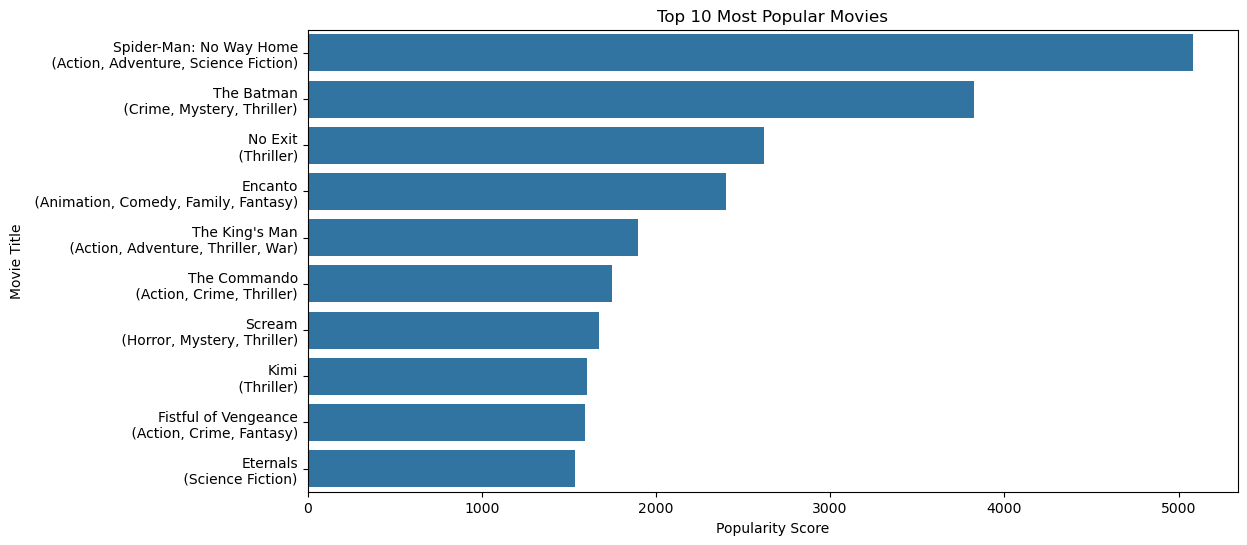

In [80]:
top_10 = df.sort_values(by='Popularity', ascending=False).head(10) # max 10 movies in popularity
top_10['Title_with_Genre'] = top_10['Title'] + '\n (' + top_10['Genre'] + ')'

plt.figure(figsize=(12,6)) 
sns.barplot(x=df["Popularity"] , y=top_10['Title_with_Genre'])
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Title')
plt.show()

What year was the largest number of films produced?

In [81]:
df["Release_Year"] = df["Release_Date"].apply(lambda x: re.search(r'\d{4}', x).group())

In [82]:
top_years = df["Release_Year"].value_counts().reset_index().sort_values(by= 'count', ascending=False).head(7)
top_years.columns = ['Year', 'Movie_Count']

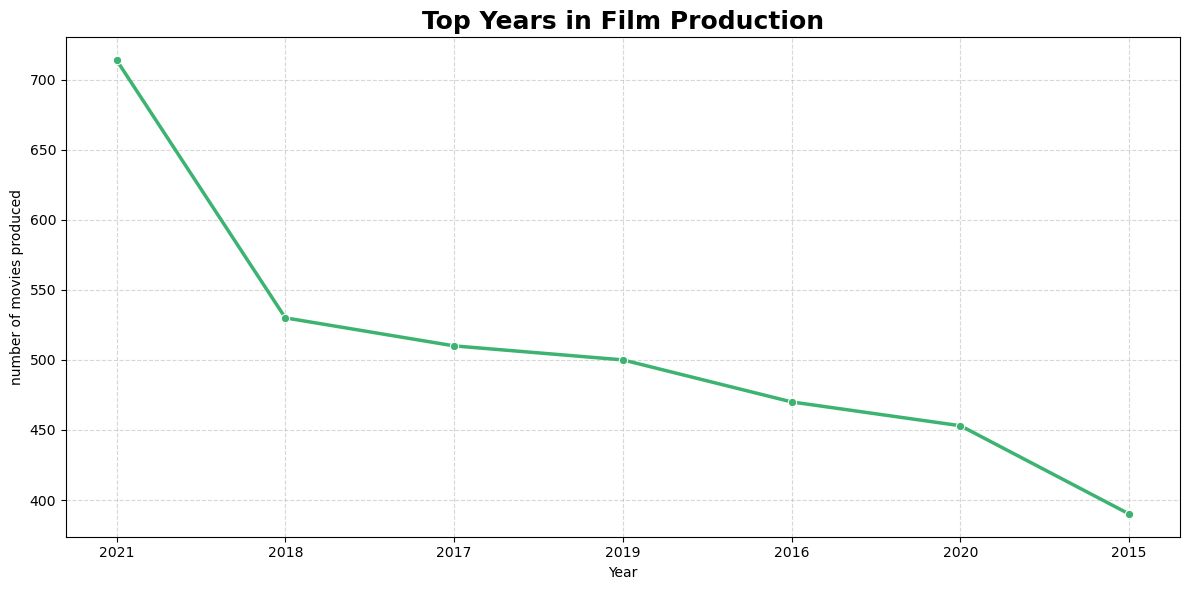

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(x=top_years['Year'],
    y=top_years['Movie_Count'],
    marker='o',
    linewidth=2.5,
    color='mediumseagreen' )

plt.title('Top Years in Film Production', fontsize=18, fontweight='bold')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('number of movies produced')
plt.show()

What is most of the film genre?

In [84]:
#genres = df['Genre'].str.split(', \s*').sum()
#genre_counts = Counter(genres)
#genre_counts
#genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by= 'Count')

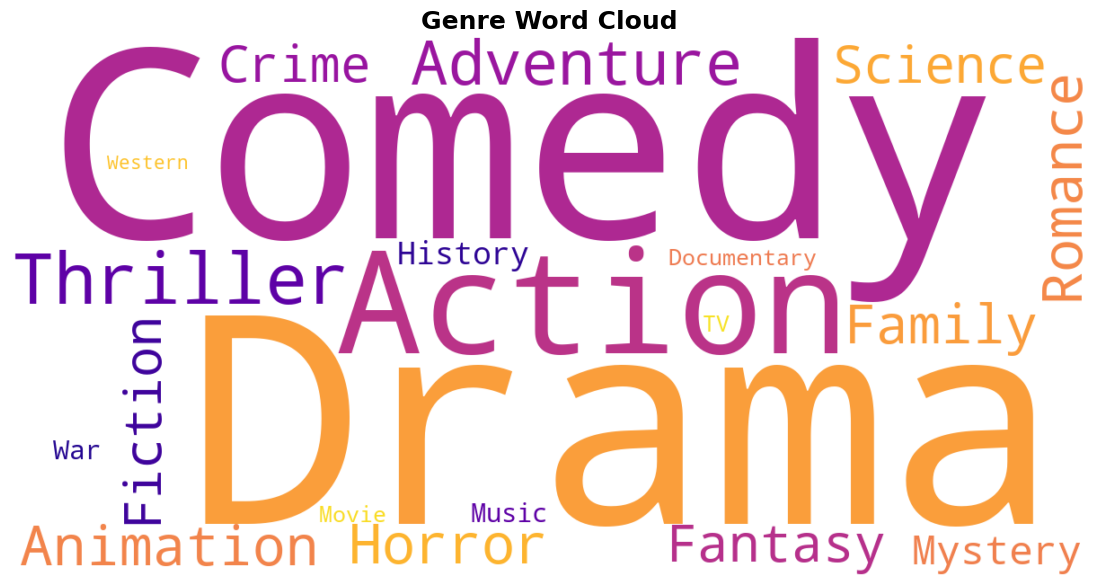

In [85]:
genre_text = ' '.join(df['Genre'].dropna().str.replace(',', ' ', regex=False))

wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='plasma', collocations=False).generate(genre_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud', fontsize=18, fontweight='bold')
plt.show()

What kind of movies take the highest rating?

In [89]:
df_genre = df.assign(Genre=df['Genre'].str.split(',\s*')).explode('Genre')
df_genre.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\samam\AppData\Local\Temp\ipykernel_6212\1640839797.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_genre = df.assign(Genre=df['Genre'].str.split(',\s*')).explode('Genre')


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022


In [ ]:
genre_rating = df_genre.groupby('Genre')[]